# Exercise Session 13 - Imbalanced Data

We will use new libraries for this exercise. 

- `imblearn` - keeps necessary sampling algorithms to deal with imbalanced data

    To install `imblearn` : 
    * via pip:  `pip install -U imbalanced-learn`
    * via conda: `conda install -c conda-forge imbalanced-learn -y`

- `mlxtend` - provides fancy visualizations for various ML problems

    To install `mlxtend` : 
    * via pip:  `pip install mlxtend  `
    * via conda: `conda install mlxtend -c conda-forge -y`

Install them in the same fashion you installed libraries previously, either in the Terminal or in this Notebook directly via the `!` command (for example, you can run `! conda install mlxtend -c conda-forge -y` in a separate cell).

Let's check that they are installed. Run the following cell:

In [1]:
import sys
print(f'Check that necessary modules are installed:')
for module in ['imblearn', 'mlxtend']:
    try: 
        exec(f'import {module}')
    except ImportError:
        pass
    print(f'{module} : {module in sys.modules}')

Check that necessary modules are installed:
imblearn : True
mlxtend : True


If some fields show you `False`, you must install those libraries and restart the Jupyter kernel. 

Once you have installed these libraries and restarted the Jupyter kernel, try to run the cell above again, to be sure that every library is imported correctly.

***


In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

from helpers import plot_two_classes, plot_statistics_curves

from sklearn.metrics import accuracy_score

# Imbalanced Data 

One of the most common problems in Machine Learning is **imbalanced** data.
That is, data where one scenario of interest occurs rarely. 

Such a problem is very common in real life. 
For example, if we model data containing *fraud*, then often the proportion of *fraud* samples in the complete dataset would be small. 

The proposed solution in this case is not unique and changes according to the problem. In general we have a few ways to face the issue of imbalanced data. Among others, the most popular are **data resampling** and **sample reweighting**. 


#### Today's exercise will be focused on data resampling: **over-sampling** and **under-sampling**.

We will employ ready-to-use functions from `sklearn` and `imblearn`, and part of your job will be to get to know how to use these functions in the code.


# 1. Apply a classifier to the imbalanced dataset

### 1.1 Create data

Let's create an imbalanced database and apply the SVM model to it for classification. 


Below, **generate the dataset** using the function `make_classification`. Your task is to find out what attributes this method takes as input to give back the database ${\bf X}$ and corresponding binary labels ${\bf y}$.

In [5]:
from sklearn.datasets import make_classification

### Hint: you can comment out the next line to see the documentation corresponding to this function
make_classification??

Signature:
make_classification(
    n_samples=100,
    n_features=20,
    *,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
)
Source:   
def make_classification(
    n_samples=100,
    n_features=20,
    *,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
):
    """Generate a random n-class classification problem.

    This initially creates clusters of points normally distributed (std=1)
    about vertices of an ``n_informative``-dimensional hypercube with sides of
    length ``2*class_sep`` and assigns an equal number of clusters to each
    class. It introduces interdependence between these

Your database must have the following properties:

* Contain **20'000** samples in total. 

* Every sample must be **two-dimensional**.

* Have **two classes** such that:
    * **class "0" gets ~95%** of the data
    * **class "1" gets only ~5%**
    
Note: Some attributes to the function are already provided. 
Your goal is to add the remaining necessary attributes **to satisfy all the properties above**.

Class "0" - 18907 samples
Class "1" - 1093 samples


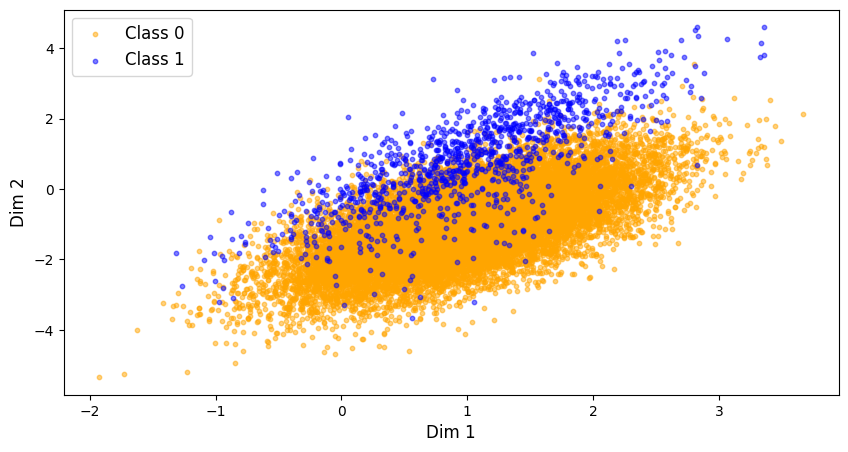

In [8]:

X, y = make_classification(n_samples=20000, n_features=2, weights=[0.95],
            n_clusters_per_class=1, n_redundant=0, random_state=0)


for c, num in sorted(Counter(y).items()):
    print(f'Class "{c}" - {num} samples') 

plot_two_classes(X, y)

### 1.2 Split the data into "train" and "test" subsets

Let's split our data into *Train* and *Test* in proportion 80% : 20% (16'000 : 4'000 samples). 

You can either implement your own function or take one from `sklearn`.

In [12]:
### Either implement your function:
def train_test_split(X,y, test_size=0.2):
    
    N = len(y)
    indices = np.arange(N)
    np.random.shuffle(indices)
    
    test_idx = int (test_size * N)
    X_test, X_train = X[indices[:test_idx]], X[indices[test_idx:]]
    y_test, y_train = y[indices[:test_idx]], y[indices[test_idx:]]

    return X_train, y_train, X_test, y_test


# ### Or take it from a library and find out how it works:
#from sklearn.model_selection import train_test_split

In [13]:
### create a database
np.random.seed(0)
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size=0.2)

Train: 	"0" = 15119, 	"1" = 881
Train shape:  (16000, 2)



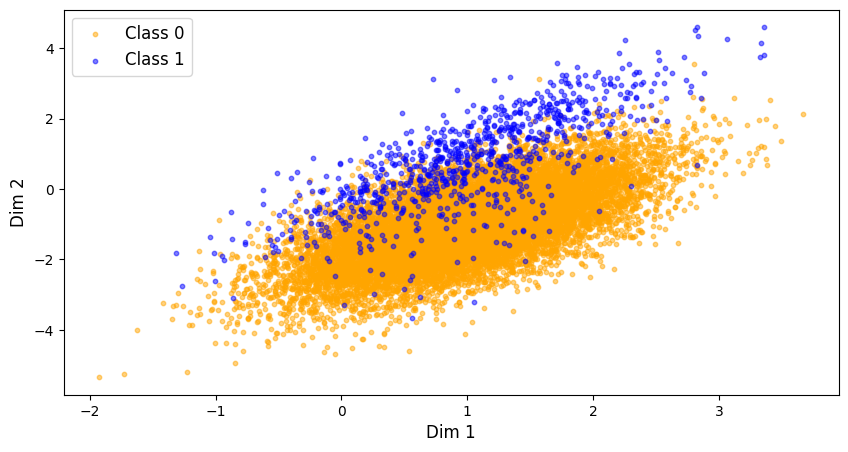

In [14]:
print(f'Train: \t"0" = {len(y_train[y_train == 0])}, \t"1" = {len(y_train[y_train == 1])}')
print('Train shape: ', X_train.shape, end='\n\n')
plot_two_classes(X_train, y_train)

Test: 	"0" = 3788, 	"1" = 212
Test shape:  (4000, 2)


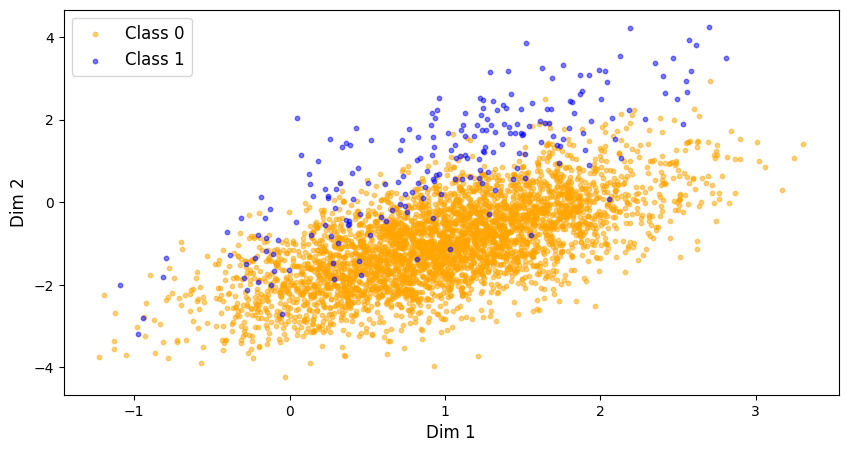

In [15]:
print(f'Test: \t"0" = {len(y_test[y_test == 0])}, \t"1" = {len(y_test[y_test == 1])}')
print('Test shape: ', X_test.shape)
plot_two_classes(X_test, y_test)

### 1.3 Fit a linear SVM (LinearSVC) model to the imbalanced data

You need to:
1. initialize the `LinearSVC` model (with C equal to 1)
2. fit it to the *Train* data,
3. obtain the predictions for the *Test* data.

In [16]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=1, random_state=0) # initialize the LinearSVC classifier model
svm_model = clf.fit(X_train, y_train) # fit the model to the Train data
y_test_pred = svm_model.predict(X_test) # obtain the prediction for the Test data

### 1.4 Compute the confusion matrix 

Let's compute the confusion matrix to get the prediction rates.

You can either implement your own function or take one from `sklearn`.

In [17]:
### Either implement your function:
def confusion_matrix(y_true, y_pred):
    
    tn = np.sum((y_pred == 0) * (y_true == 0))
    fp = np.sum((y_pred == 1) * (y_true == 0))
    fn = np.sum((y_pred == 0) * (y_true == 1))
    tp = np.sum((y_pred == 1) * (y_true == 1))
    
    conf_matrix = np.array([
        [tn, fp],
        [fn, tp]
    ])
    return conf_matrix


# ### Or take it from a library and find out how it works:
# from sklearn.metrics import confusion_matrix

Confusion Matrix:
[[3773   15]
 [ 111  101]]
101 samples from the rare "class 1" are correctly classified
111 samples from the rare "class 1" are missed.

Accuracy: 0.9685


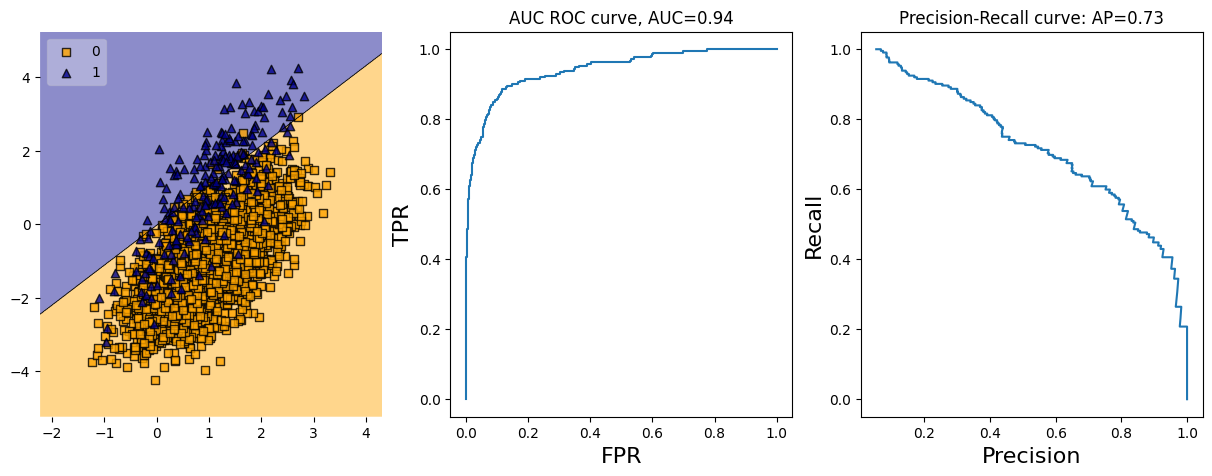

In [18]:
### Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(f"Confusion Matrix:\n{conf_mat}")
print(f'{conf_mat[1][1]} samples from the rare "class 1" are correctly classified')
print(f'{conf_mat[1][0]} samples from the rare "class 1" are missed.')

print(f"\nAccuracy: {accuracy_score(y_test, y_test_pred)}")

### plot the ROC and precision-recall curves, plot the data with the decision boundary
plot_statistics_curves(X_test, y_test, svm_model)

It is clear from the image and the confusion matrix that the dense yellow class ("class 0") pushes the decision boundary so that many samples from the minority blue class ("class 1") are on the wrong side. 

It happens exactly because "class 1" points are underrepresented in the dataset.
Note that the accuracy value itself is nonetheless very high. 


We will now improve this result with **resampling**.

# 2 Over-sampling

We are going to produce a more balanced data set and see how the results change. For this, we will first use the **over-sampling** strategy.

### 2.1 Oversample the dataset

Use `RandomOverSampler` to over-sample the minority class. 

Class "0" - 15119 samples
Class "1" - 15119 samples


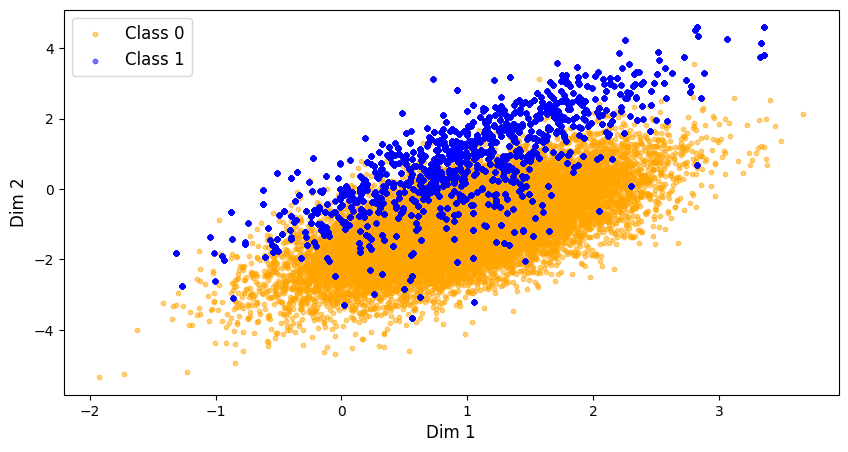

In [20]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train) # resample Train data 

for c, num in sorted(Counter(y_train_resampled).items()):
    print(f'Class "{c}" - {num} samples') 

plot_two_classes(X_train_resampled, y_train_resampled)

The underrepresented class was successfully over-sampled! Now the number of samples per each class is the same, and the dataset is **balanced**.

### 2.2 Fit a linear SVM model to the over-sampled data

Repeat the same procedure as earlier. 

You need to:
1. initialize the `LinearSVC` model (again with C set to 1), 
2. fit it to the *Train_resampled* data,
3. obtain the predictions for the *Test_resampled* data.

In [22]:
clf = LinearSVC(C=1, random_state=0) # initialize the LinearSVC classifier model
svm_model = clf.fit(X_train_resampled, y_train_resampled) # fit the model to the Train resampled data
y_test_pred = svm_model.predict(X_test) # obtain the prediction for the Test resampled data

Confusion Matrix:
[[3267  521]
 [  23  189]]
189 samples from the rare "class 1" are correctly classified
23 samples from the rare "class 1" are missed.

Accuracy: 0.864


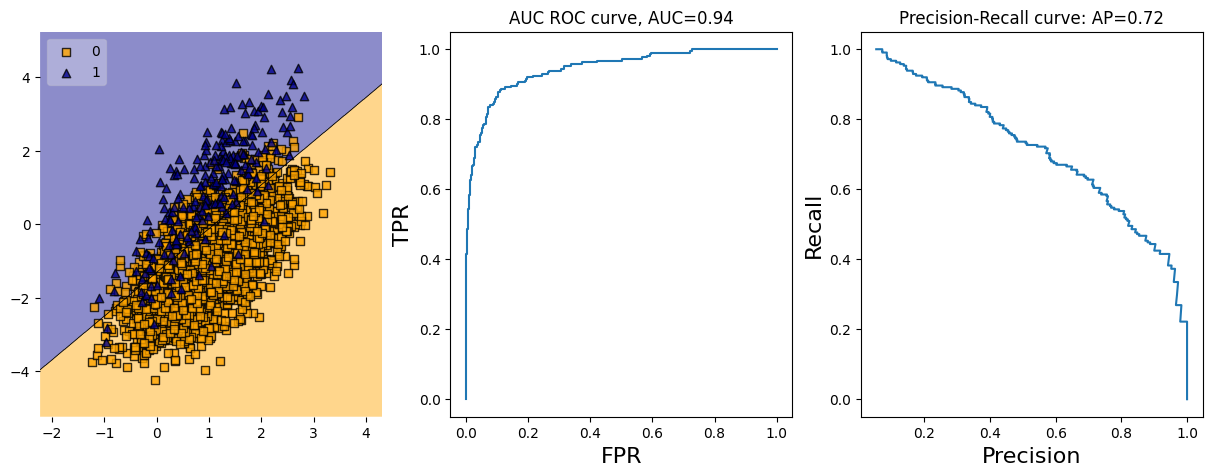

In [23]:
### Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(f"Confusion Matrix:\n{conf_mat}")
print(f'{conf_mat[1][1]} samples from the rare "class 1" are correctly classified')
print(f'{conf_mat[1][0]} samples from the rare "class 1" are missed.')

print(f"\nAccuracy: {accuracy_score(y_test, y_test_pred)}")

### plot the ROC and precision-recall curves, plot the data with the decision boundary
plot_statistics_curves(X_test, y_test, svm_model)

We see that on the Test set the decision boundary hasn't been pushed by the "class 0" samples and gives more importance to "class 1". Hence, most rare samples are classified correctly! 

Note however that the accuracy has also dropped. If our primary goal is to catch rare events, such as cancer tumors or suspicious activity in financial transactions, we may need to sacrifice the overall accuracy.

# 3. Under-sampling

Let's take the same data as before and but now perform a random under-sampling.

### 3.1 Undersample the dataset

Use `RandomUnderSampler` to under-sample the majority class. 

Class "0" - 881 samples
Class "1" - 881 samples


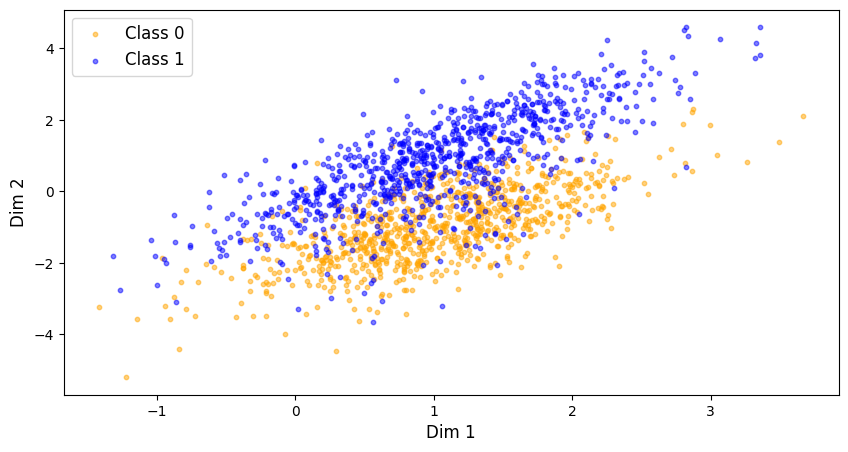

In [24]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train) # resample Train data 

for c, num in sorted(Counter(y_train_resampled).items()):
    print(f'Class "{c}" - {num} samples') 

plot_two_classes(X_train_resampled, y_train_resampled)

### 3.2 Fit a linear SVM model to the under-sampled data

Repeat the same procedure as earlier. 

You need to:
1. initialize the `LinearSVC` model, 
2. fit it to the *Train_resampled* data,
3. obtain the predictions for the *Test_resampled* data.

In [26]:
clf = LinearSVC(C=1, random_state=0) # initialize the LinearSVC classifier model
svm_model = clf.fit(X_train_resampled, y_train_resampled) # fit the model to the Train resampled data
y_test_pred = svm_model.predict(X_test) # obtain the prediction for the Test resampled data

Confusion Matrix:
[[3288  500]
 [  23  189]]
189 samples from the rare "class 1" are correctly classified
23 samples from the rare "class 1" are missed.

Accuracy: 0.86925


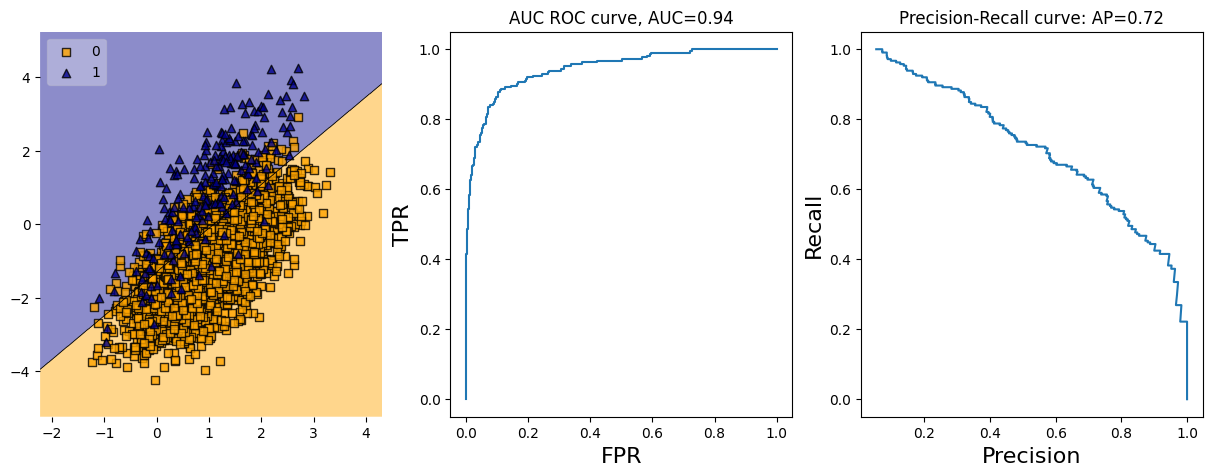

In [27]:
### Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(f"Confusion Matrix:\n{conf_mat}")
print(f'{conf_mat[1][1]} samples from the rare "class 1" are correctly classified')
print(f'{conf_mat[1][0]} samples from the rare "class 1" are missed.')

print(f"\nAccuracy: {accuracy_score(y_test, y_test_pred)}")

### plot the ROC and precision-recall curves, plot the data with the decision boundary
plot_statistics_curves(X_test, y_test, svm_model)

Under-sampling yields a very similar behavior to the over-sampling method. Of course, the class distributions might be more complex than ellipsoids (normal distributions) as here. Then, it would still be worth trying both approaches. 

Out of curiosity, run another experiment. 

Change the probability of the "class 0" to be 99%. Restart the Notebook and run all the cells again. Compare the results obtained with classifiers trained on the original data and on the resampled data.